# Analiza podatkov

## Nalaganje podatkov

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use("dark_background")
pd.set_option("display.max_rows", 10)

animeji = pd.read_csv("anime.csv", index_col="anime id")
anime_zvrsti = pd.read_csv("anime_zvrsti.csv", index_col="anime id")
anime_studii = pd.read_csv("anime_studii.csv", index_col="anime id")

animeji.index.name = None
anime_zvrsti.index.name = None
anime_studii.index.name = None


In [85]:
animeji.head(10)

,naslov,ocena,tip,število epizod,leto izdaje,število članov
52991,Sousou no Frieren,9.29,TV,28,2023,1202293
5114,Fullmetal Alchemist: Brotherhood,9.10,TV,64,2009,3564751
9253,Steins;Gate,9.07,TV,24,2011,2728922
38524,Shingeki no Kyojin Season 3 Part 2,9.05,TV,10,2019,2486087
39486,Gintama: The Final,9.05,Movie,1,2021,173489
28977,Gintama°,9.05,TV,51,2015,674457
11061,Hunter x Hunter (2011),9.03,TV,148,2011,3068840
60022,One Piece Fan Letter,9.03,TV Special,1,2024,124289
820,Ginga Eiyuu Densetsu,9.02,OVA,110,1988,349294
9969,Gintama',9.02,TV,51,2011,596286


In [86]:
anime_zvrsti.head(10)

,zvrst
52991,Adventure
52991,Drama
52991,Fantasy
5114,Action
5114,Adventure
5114,Drama
5114,Fantasy
9253,Drama
9253,Sci-Fi
9253,Suspense


In [88]:
anime_studii.head(10)

,studio
52991,Madhouse
5114,Bones
9253,White Fox
38524,Wit Studio
39486,Bandai Namco Pictures
28977,Bandai Namco Pictures
11061,Madhouse
60022,Toei Animation
820,K-Factory
820,Kitty Film Mitaka Studio


In [100]:
povprecja = animeji.groupby("tip")["ocena"].mean().sort_values(ascending=False)
povprecja

tip
TV Special    8.216818
TV            8.211413
Movie         8.190588
ONA           8.161136
Special       8.078065
OVA           8.072361
Name: ocena, dtype: float64

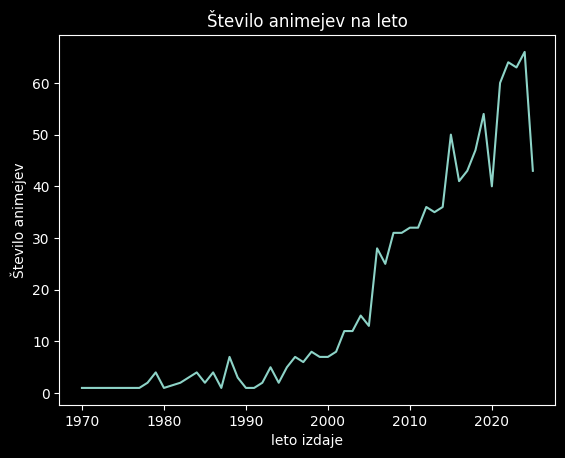

In [108]:
st_animejev_na_leto = animeji["leto izdaje"].value_counts().sort_index()
st_animejev_na_leto.plot(kind="line")
plt.title("Število animejev na leto")
plt.ylabel("Število animejev")
plt.show()